# Load the dataset and import necessary libraries

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = fetch_california_housing()

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Data preprocessing and EDA

In [5]:
#min and max values of each attribute and the target
for i in range(len(dataset.feature_names)):
    print(f"column {i}: min: {np.min(dataset.data[:, i])} and max: {np.max(dataset.data[:, i])}")
reshaped_target = dataset.target.reshape(dataset.data.shape[0], 1)
print(reshaped_target.shape)
print(f"target: min: {np.min(reshaped_target)} and max: {np.max(reshaped_target)}")

column 0: min: 0.4999 and max: 15.0001
column 1: min: 1.0 and max: 52.0
column 2: min: 0.8461538461538461 and max: 141.9090909090909
column 3: min: 0.3333333333333333 and max: 34.06666666666667
column 4: min: 3.0 and max: 35682.0
column 5: min: 0.6923076923076923 and max: 1243.3333333333333
column 6: min: 32.54 and max: 41.95
column 7: min: -124.35 and max: -114.31
(20640, 1)
target: min: 0.14999 and max: 5.00001


In [6]:
#scaling the features and target to the range [0, 1]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(dataset.data)
scaled_target = min_max_scaler.fit_transform(reshaped_target)

In [7]:
#store the dataset as a pandas dataframe
df = pd.DataFrame(data = scaled_data, columns = dataset.feature_names)
#append the target variable
df["Y"] = scaled_target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638


In [8]:
#check if there's any missing value
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Y             0
dtype: int64

In [9]:
#a short summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Y           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
#let's check descriptive statistics of the dataset e.g. mean, max, min, std etc. of each feature vector
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125,0.395579
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555,0.237928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984,0.215671
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665,0.339588
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474,0.514897
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#randomize the instances before splitting the dataset into train and test set
from sklearn.utils import shuffle
df = shuffle(df, random_state = 9)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
20558,0.279493,0.176471,0.033123,0.019920,0.029990,0.001727,0.651435,0.253984,0.287424
11430,0.369250,0.411765,0.039712,0.019421,0.052356,0.001923,0.119022,0.635458,0.549484
2656,0.099433,0.607843,0.048212,0.056541,0.012080,0.001311,0.822529,0.009960,0.125981
14267,0.075406,0.705882,0.022346,0.021149,0.069677,0.002787,0.015940,0.721116,0.147012
3684,0.183197,0.686275,0.026569,0.022013,0.033017,0.002579,0.177471,0.595618,0.332784


In [12]:
train = df.iloc[2064:]
test = df.iloc[:2064]
train.shape, test.shape

((18576, 9), (2064, 9))

In [13]:
#plot function for data distribution of each attribute and the target
def histplot(rows, columns, data, grid = "darkgrid", hspace = 0.5, suptitle = "Data distributions of the variables and the target"):
    """
    Creates data distribution subplot of each given variable.
    Input: rows (number of rows), columns (number of columns in the plot), data, grid, hspace and suptitle.
    Output: subplots of data distribution or histplot of the given variables.
    """
    sns.set(rc = {"figure.figsize": (15, 12)})
    sns.set_theme(style = grid)
    fig, axes = plt.subplots(rows, columns)
    plt.subplots_adjust(hspace = hspace)
    count = 0
    if len(data.keys()) % 2 != 0:
        for row in range(rows):
            for column in range(columns):
                if (row == rows - 1 and column == columns - 1):
                    fig.delaxes(axes[row, column])
                else:
                    sns.histplot(data[data.keys()[count]], ax = axes[row, column], kde = True)
                    #kde is kernel density estimation that estimates the pdf of a continuous random variable
                count += 1
    else:
        for row in range(rows):
            for column in range(columns):
                sns.histplot(data[data.keys()[count]], ax = axes[row, column], kde = True)
                count += 1
    plt.suptitle(suptitle)
    plt.show()

In [14]:
#plot function for violinplot of each attribute and the target
def violinplot(rows, columns, data, grid = "darkgrid", hspace = 0.5, suptitle = "Violinplots of the variables and the target"):
    """
    Creates subplots of violinplots that is a combination of boxplot and kde.
    Input: rows (number of rows), columns (number of columns in the plot), data, grid, hspace and suptitle.
    Output: violinplots of the given variables.
    """
    sns.set(rc = {"figure.figsize": (15, 12)})
    sns.set_theme(style = grid)
    fig, axes = plt.subplots(rows, columns)
    plt.subplots_adjust(hspace = hspace)
    count = 0
    if len(data.keys()) % 2 != 0:
        for row in range(rows):
            for column in range(columns):
                if (row == rows - 1 and column == columns - 1):
                    fig.delaxes(axes[row, column])
                else:
                    sns.violinplot(x = data[data.keys()[count]], ax = axes[row, column])
                count += 1
    else:
        for row in range(rows):
            for column in range(columns):
                sns.violinplot(x = data[data.keys()[count]], ax = axes[row, column])
                count += 1
    plt.suptitle(suptitle)
    plt.show()

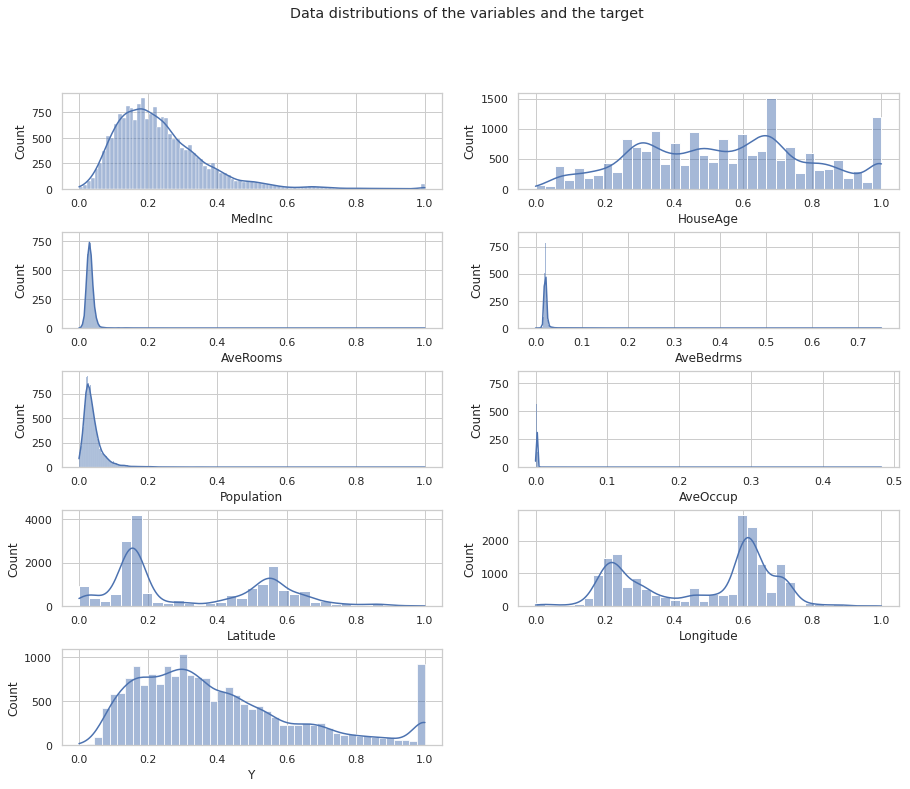

In [15]:
histplot(5, 2, train, "whitegrid", hspace = 0.45)

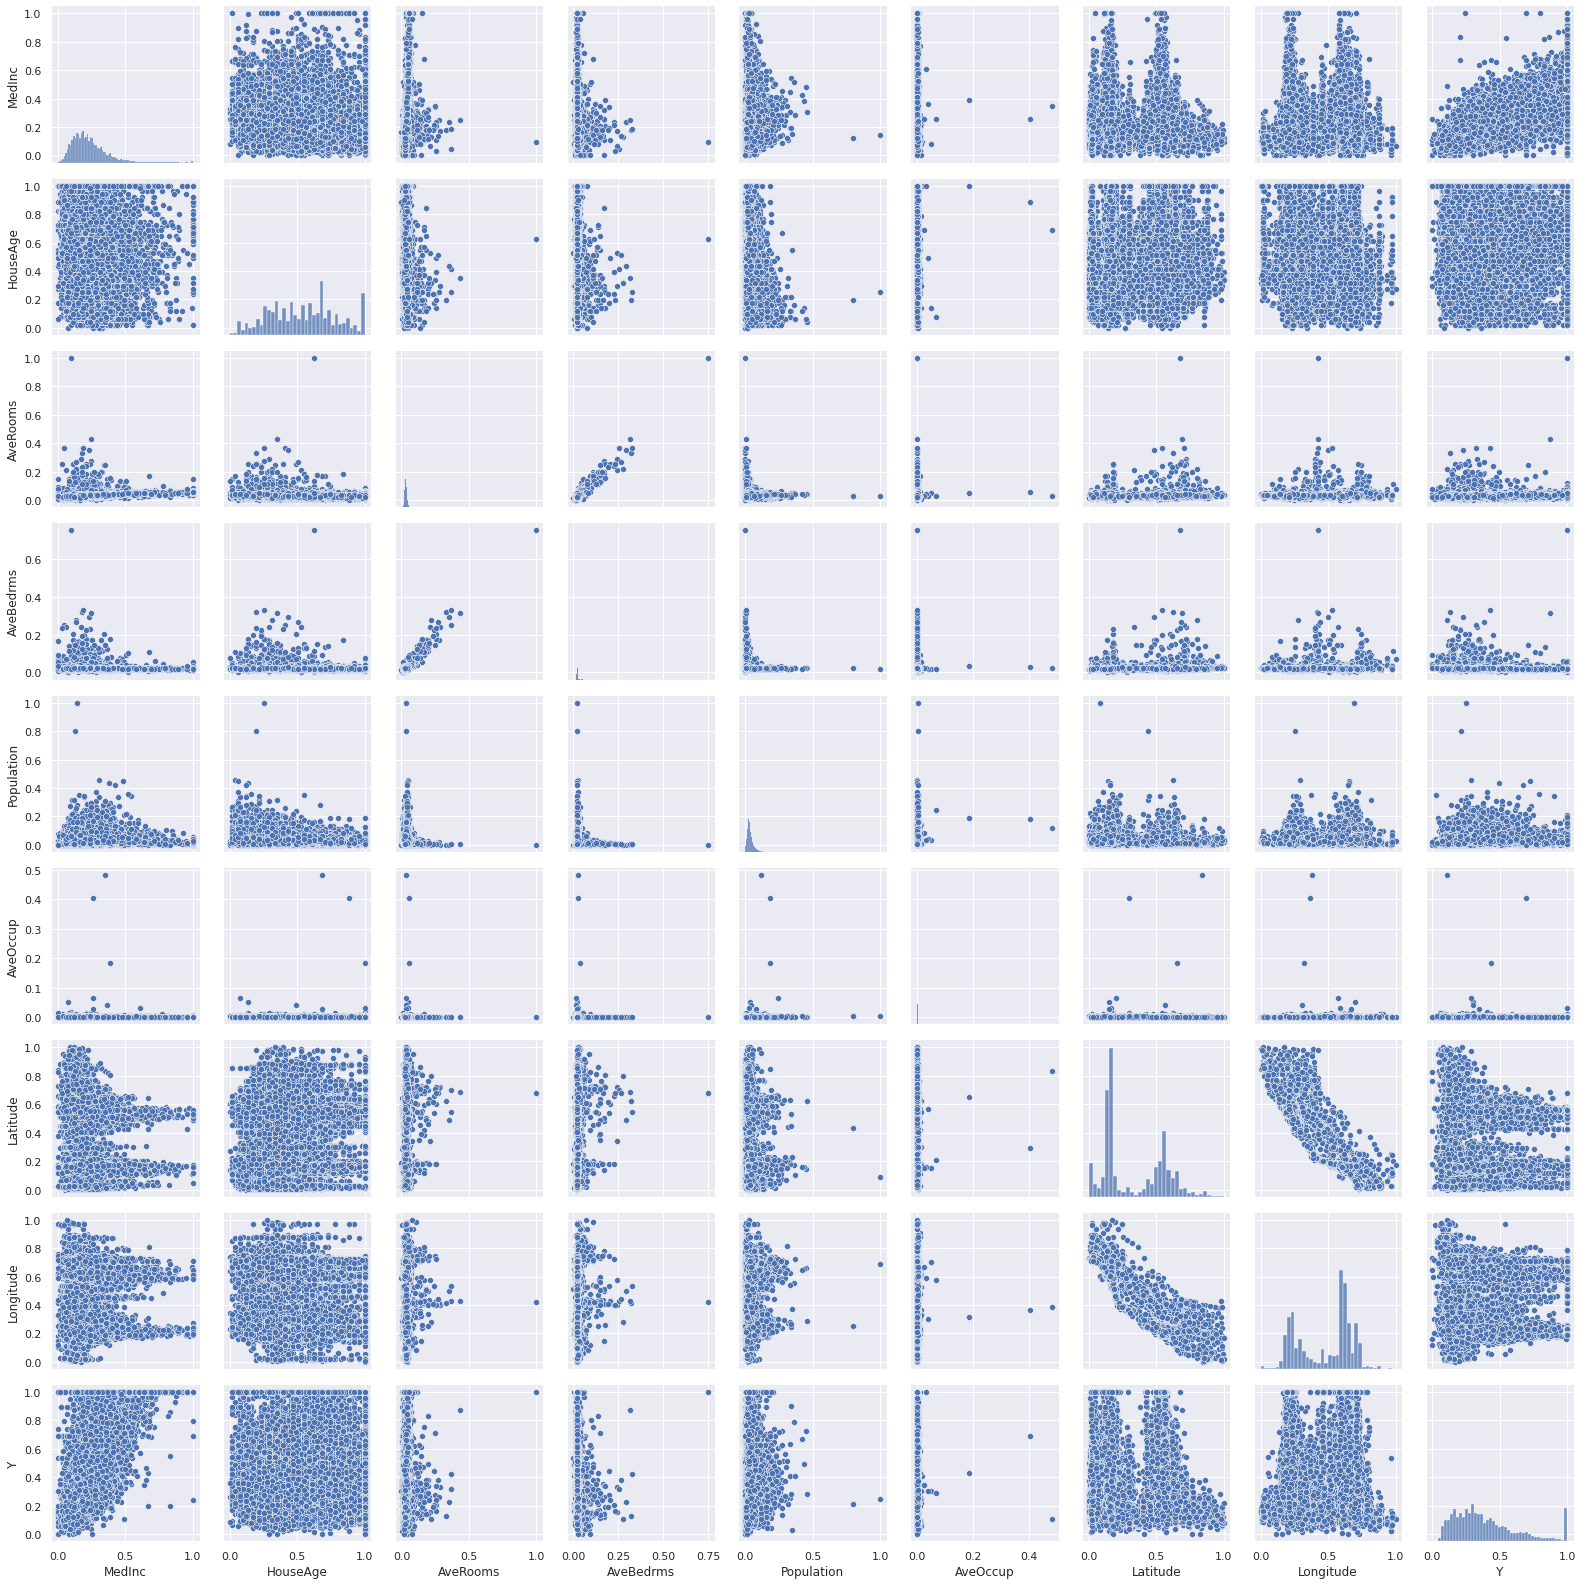

In [16]:
#pairwise relationship between the variables and the target
sns.set_theme(style = "darkgrid")
g = sns.PairGrid(train)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

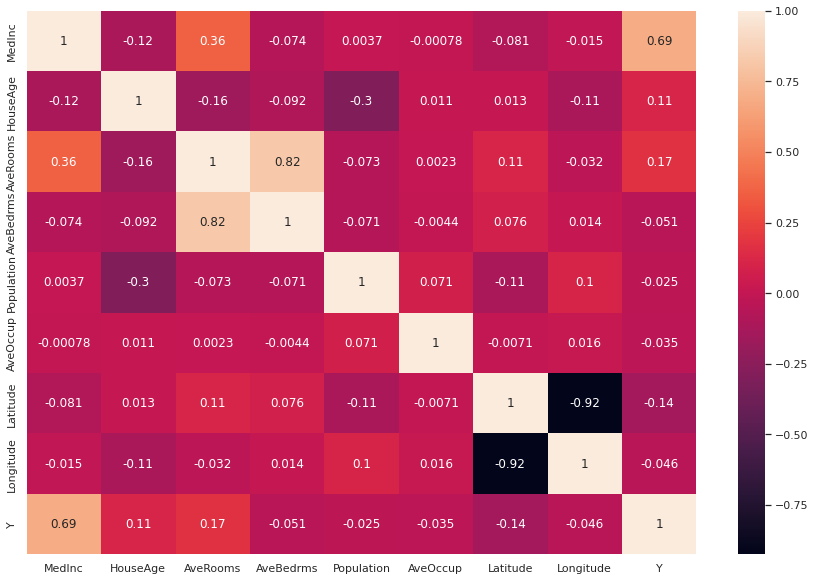

In [17]:
#correlation matrix visualize the linear relationship between the variables and target
sns.set(rc = {"figure.figsize": (15, 10)})
corr_matrix = train.corr()
sns.heatmap(data = corr_matrix, annot = True)
plt.show()
#prints the values inside the squares if annot is True
#the correlation coeffcient ranges from -1 to 1
#if the value is close to 1, there's a strong positive correlation between the variables
#there's a strong negative correlation if the value is close to -1

We should choose the variables that are highly correlated with the target variable. But always check for multi-co-linearity while choosing the attributes. If two features are highly correlated with the target and those two are strongly correlated with each other then choose one of those, not both.

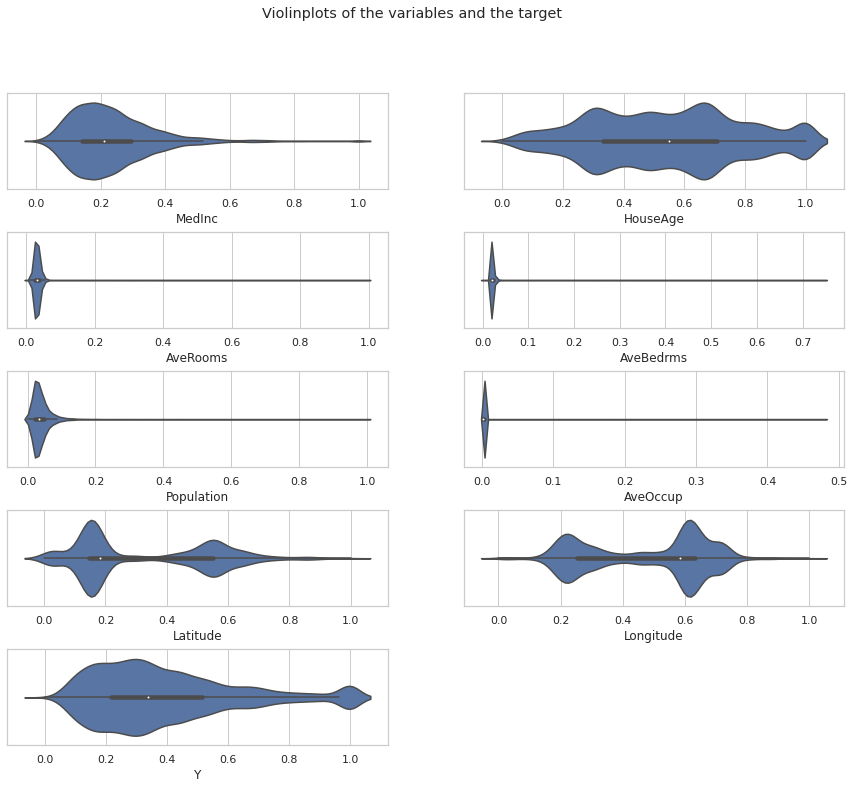

In [18]:
violinplot(5, 2, train, "whitegrid", hspace = 0.45)

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
linr_model = LinearRegression()
linr_model.fit(train[train.keys()[:8]], train[train.keys()[:-1]])

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error
train_prediction_LRtraining = linr_model.predict(train[train.keys()[:8]])
mse_LRtraining = mean_squared_error(train[train.keys()[:-1]], train_prediction_LRtraining)
print("Model performance on the training data")
print(f"Mean Squared Error: {mse_LRtraining}\n")
test_prediction_LRtest = linr_model.predict(test[test.keys()[:8]])
mse_LRtest = mean_squared_error(test[test.keys()[:-1]], test_prediction_LRtest)
print("Model performance on the test data")
print(f"Mean Squared Error: {mse_LRtest}")

Model performance on the training data
Mean Squared Error: 5.041368818638874e-31

Model performance on the test data
Mean Squared Error: 5.010948333085659e-31


## Polynomial regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(train[train.keys()[:8]])

poly_model = LinearRegression()
poly_model.fit(X_train_poly, train[train.keys()[:-1]])

train_prediction_PRtraining = poly_model.predict(X_train_poly)

test_prediction_PRtest = poly_model.predict(poly_features.fit_transform(test[test.keys()[:8]]))

mse_PRtraining = mean_squared_error(train[train.keys()[:-1]], train_prediction_PRtraining)
print("Model performance on the training data")
print(f"Mean Squared Error: {mse_PRtraining}\n")
mse_PRtest = mean_squared_error(test[test.keys()[:-1]], test_prediction_PRtest)
print("Model performance on the test data")
print(f"Mean Squared Error: {mse_PRtest}")

Model performance on the training data
Mean Squared Error: 3.0942818938050335e-30

Model performance on the test data
Mean Squared Error: 3.148805921968082e-30


## MLP

In [24]:
import tensorflow as tf
from tensorflow import keras

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(20, activation = "relu", input_shape = [8]),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(10, activation = "relu"),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 20)                180       
_________________________________________________________________
dropout_12 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(
    train[train.keys()[:8]][576:], train[train.keys()[:-1]][576:],
    epochs = 1000,
    validation_data = (train[train.keys()[:8]][:576], train[train.keys()[:-1]][:576]),
    callbacks = [keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)]
)

Epoch 1/1000
563/563 [==============================] - 1s 2ms/step - loss: 0.0688 - val_loss: 0.0623
Epoch 2/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.0642 - val_loss: 0.0622
Epoch 3/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.0634 - val_loss: 0.0623
Epoch 4/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.0632 - val_loss: 0.0623
Epoch 5/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.0631 - val_loss: 0.0623
Epoch 6/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.0630 - val_loss: 0.0623
Epoch 7/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.0629 - val_loss: 0.0623
Epoch 8/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.0629 - val_loss: 0.0623
Epoch 9/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.0629 - val_loss: 0.0624
Epoch 10/1000
563/563 [==============================] - 1s 1ms/step - loss: 0.062

In [40]:
mse_train = model.evaluate(train[train.keys()[:8]], train[train.keys()[:-1]])
mse_test = model.evaluate(test[test.keys()[:8]], test[test.keys()[:-1]])

65/65 [==============================] - 0s 1ms/step - loss: 0.0616
